In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Walmart_Store_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


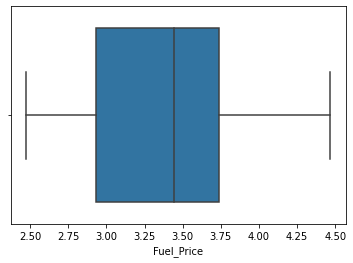

In [3]:
sns.boxplot(df['Fuel_Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


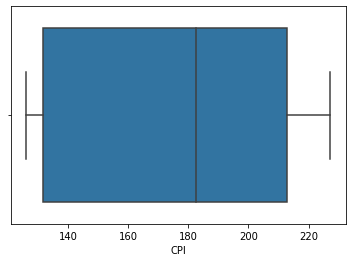

In [4]:
sns.boxplot(df['CPI'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


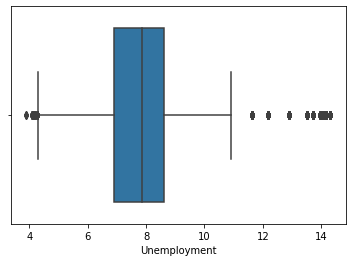

In [5]:
sns.boxplot(df['Unemployment'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


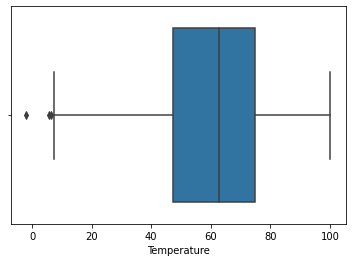

In [6]:
sns.boxplot(df['Temperature'])

In [7]:
df = df[df['Unemployment'] <= 10.5]
df = df[df['Unemployment'] >= 4.7]
df = df[df['Temperature'] >= 8]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


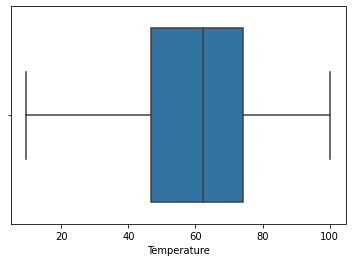

In [8]:
sns.boxplot(df['Temperature'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


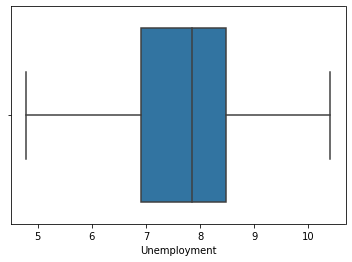

In [9]:
sns.boxplot(df['Unemployment'])

In [10]:
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.drop(columns=["Date"],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5763 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5763 non-null   int64  
 1   Weekly_Sales  5763 non-null   float64
 2   Holiday_Flag  5763 non-null   int64  
 3   Temperature   5763 non-null   float64
 4   Fuel_Price    5763 non-null   float64
 5   CPI           5763 non-null   float64
 6   Unemployment  5763 non-null   float64
 7   Day           5763 non-null   int64  
 8   Month         5763 non-null   int64  
 9   Year          5763 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 495.3 KB


In [12]:
# Define Independent and dependent variable
x = df[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]
y = df['Weekly_Sales']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,accuracy_score

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

print('* Linear Regression *\n')

print('Test Accuracy Score:', r2_score(y_test, lr_y_pred).round(5)*100, '%')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred).round(3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred).round(3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)).round(3))



* Linear Regression *

Test Accuracy Score: 11.776 %
Mean Absolute Error: 453880.309
Mean Squared Error: 303652130492.333
Root Mean Squared Error: 551046.396


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


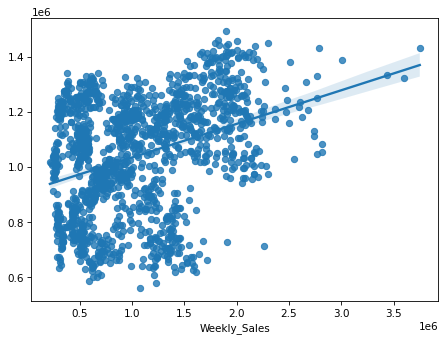

In [16]:
#plot scatterplot
plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, lr_y_pred)

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=13)
rfr.fit(x_train,y_train)

rfr_y_pred = rfr.predict(x_test)

R2_rfr = r2_score(y_test, rfr_y_pred)
mae = metrics.mean_absolute_error(y_test, rfr_y_pred)
mse = metrics.mean_squared_error(y_test, rfr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred))

print('* Random Forest Regressor *\n')

print('Accuracy       r^2       =', R2_rfr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))


* Random Forest Regressor *

Accuracy       r^2       = 93.413 %
Mean Absolute Error      = 86335.70228
Mean Squared Error       = 22672092978.05802
Root Mean Squared Error  = 150572.55055


In [18]:
from sklearn import linear_model
SGDReg =linear_model.SGDRegressor(
   max_iter = 1000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True
)
SGDReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDRegressor(average=True, loss='huber', penalty='elasticnet')

In [19]:
SGDReg = rfr.predict(x_test)

SGDReg1 = r2_score(y_test, SGDReg)
m = metrics.mean_absolute_error(y_test, SGDReg)
ms = metrics.mean_squared_error(y_test, SGDReg)
rms = np.sqrt(metrics.mean_squared_error(y_test, SGDReg))

print('* Random Forest Regressor *\n')

print('Accuracy       r^2       =', SGDReg1.round(5)*100,'%')
print('Mean Absolute Error      =', m.round(5))
print('Mean Squared Error       =', ms.round(5))
print('Root Mean Squared Error  =', rms.round(5))

* Random Forest Regressor *

Accuracy       r^2       = 93.413 %
Mean Absolute Error      = 86335.70228
Mean Squared Error       = 22672092978.05802
Root Mean Squared Error  = 150572.55055


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


* Decision Tree Regressor *

Accuracy                 = 89.46600000000001 %
Mean Absolute Error      = 104458.57802
Mean Squared Error       = 36254791222.54093
Root Mean Squared Error  = 190406.9096


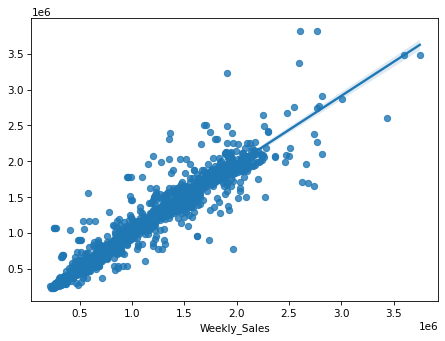

In [20]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

dtr_y_pred = dtr.predict(x_test)

R2_dtr = r2_score(y_test,dtr_y_pred)
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

print('* Decision Tree Regressor *\n')

print('Accuracy                 =', R2_dtr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, dtr_y_pred)


* Decision Tree Regressor *

Accuracy                 = 89.537 %
Mean Absolute Error      = 103036.74224
Mean Squared Error       = 36011730104.5894
Root Mean Squared Error  = 189767.56863


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


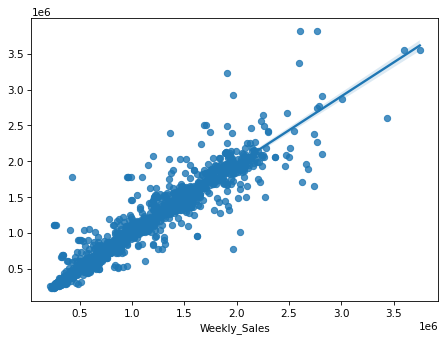

In [21]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

dtr_y_pred = dtr.predict(x_test)

R2_dtr = r2_score(y_test,dtr_y_pred)
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

print('* Decision Tree Regressor *\n')

print('Accuracy                 =', R2_dtr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, dtr_y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

knn_y_pred = knn.predict(x_test)

R2_knn = r2_score(y_test, knn_y_pred)
mae = metrics.mean_absolute_error(y_test, knn_y_pred)
mse = metrics.mean_squared_error(y_test, knn_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))

print('* KNearest Neighbors *\n')

print('Accuracy                 =', R2_knn.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, knn_y_pred)

* KNearest Neighbors *

Accuracy                 = 41.785 %
Mean Absolute Error      = 346352.94138
Mean Squared Error       = 200363894885.6829
Root Mean Squared Error  = 447620.25746


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
